# Rolling average air quality since 2010 for new york city

you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


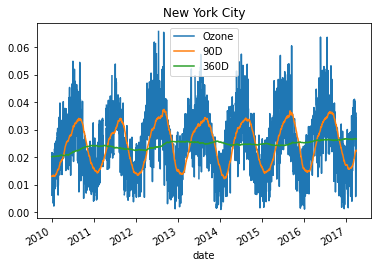

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Import and inspect ozone data here
data = pd.read_csv('dataset/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data['Ozone'].rolling(window='90D').mean()
data['360D'] = data['Ozone'].rolling(window='360D').mean()

# Plot data
data['2010':].plot(title = 'New York City')
plt.show()

# Rolling 360-day median & std. deviation for nyc ozone data since 2000

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and `.agg()` to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

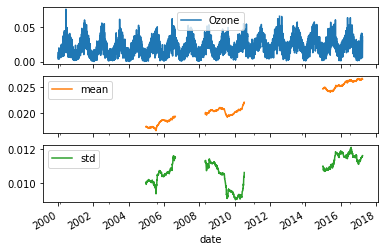

In [5]:
data = pd.read_csv('dataset/ozone_nyc.csv', parse_dates=['date'], index_col='date')
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window = 360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots = True)
plt.show()

# Rolling quantiles for daily air quality in nyc

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


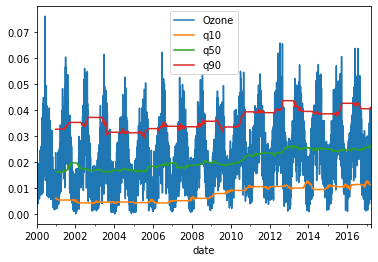

In [6]:
data = pd.read_csv('dataset/ozone_nyc.csv', parse_dates=['date'], index_col='date')


# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data['Ozone'].rolling(window = 360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()

plt.show()

# Cumulative sum vs .diff()

The cumulative sum method has in fact the opposite effect of the `.diff()` method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [15]:
data = pd.read_csv('dataset/ozone_nyc.csv', parse_dates=['date'], index_col='date')
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [16]:
# Calculate differences
differences = data.diff().dropna()

differences.head()

,Ozone
date,
2000-01-02,0.005454
2000-01-03,-0.003906
2000-01-04,0.003137
2000-01-05,0.005036
2000-01-06,-0.004684


In [17]:
# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()


cumulative_sum.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


# Cumulative return on $1,000 invested in google vs apple I

To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

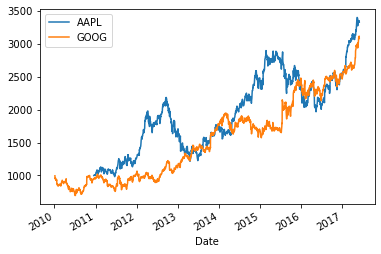

In [20]:
data = pd.read_csv('dataset/apple_google.csv', parse_dates=['Date'], index_col='Date')
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

# Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

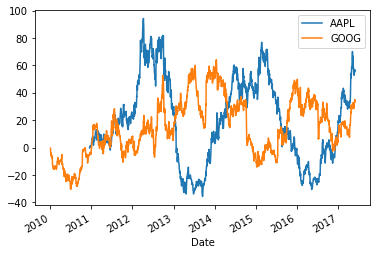

In [21]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

# Random walk I

you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.

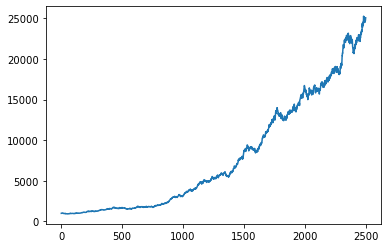

In [25]:
import numpy as np
# Set seed here
np.random.seed(42)

# Create random_walk
random_walk = np.random.normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()


# Random walk II

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [46]:
import seaborn as sns
fb = pd.read_csv('dataset/fb.csv', parse_dates=['date'], index_col='date')
# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()
# Get n_obs
n_obs = len(daily_returns)
print(n_obs)
daily_returns.head()

1266


,val
date,
2012-05-18,0.006053
2012-05-21,-0.109861
2012-05-22,-0.089039
2012-05-23,0.032258
2012-05-24,0.032188


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


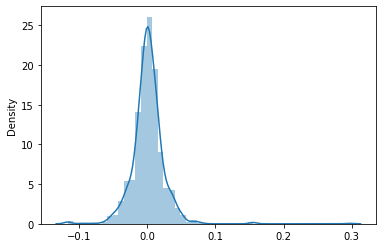

In [47]:

# Create random_walk
random_walk = np.random.choice(daily_returns["val"], size = n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

# Random walk III

In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

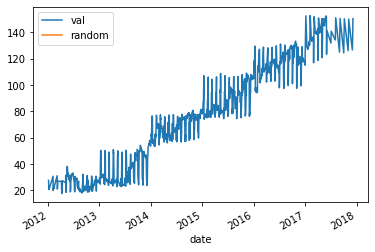

In [48]:
# Select fb start price here
start = fb["val"].first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()

plt.show()

# Annual return correlations among several stocks

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.639423 -0.782640 -0.139609 -0.087176 -0.064160  0.196741   
AMGN  0.639423  1.000000 -0.267567 -0.484273  0.265609  0.174887  0.780599   
AMZN -0.782640 -0.267567  1.000000 -0.221807  0.157860  0.147352  0.161325 

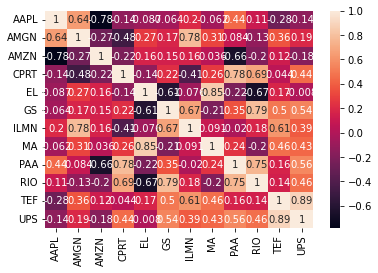

In [50]:
data = pd.read_csv('dataset/stocks_4.csv', parse_dates=['Date'], index_col='Date')
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations,annot=True)
plt.show()